# BNN

### What have we learned?
- does uncertainty increase when random features?: YES! VERY MUCH
- Can you look at the mean and variance of the last layer to figure out which TFs are not being predicted well?
-- only looked at 2 cases. it seems for CTCF the means are higher, but STD is more variable (try sigmoiding it) THERE IS a correlation across all the factors. this may be due to some factors having few positives (seem to be a correlation between # positives in dataset and PR performance)
- does method perform as well? YES
- Does uncertainty decrease over many iterations? Plot epochs vs stdev: hardly looks like its moving

In [2]:
from epitome.constants import *
from epitome.models import *
from epitome.generators import *
from epitome.functions import *
from epitome.viz import *
from sklearn.metrics import roc_curve, auc
assert(tf.executing_eagerly())
import tensorflow_probability as tfp
import yaml
import tensorflow as tf

/data/miniconda3/envs/EpitomeEnv_c76/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [4]:
# load in user paths
# TODO: make a config file with data_path (downloaded from bin/download_deepsea_data.py) 
# and feature_name_file (at data/feature_name)
# My config.yml looks like:
# data_path: /data/akmorrow/epitome_data/numpy_data/
# feature_name_file: /home/eecs/akmorrow/epitome/data/feature_name

with open('/home/eecs/akmorrow/EPITOME/epitome/config.yml') as f:
    config = yaml.safe_load(f)
    
train_data, valid_data, test_data = load_epitome_data(config["epitome_data_dir"])
data = {Dataset.TRAIN: train_data, Dataset.VALID: valid_data, Dataset.TEST: test_data}
print(data[Dataset.TRAIN].shape, data[Dataset.VALID].shape, data[Dataset.TEST].shape)

(1279, 2787878) (1279, 187696) (1279, 293266)


In [26]:
os.path.exists

<function genericpath.exists(path)>

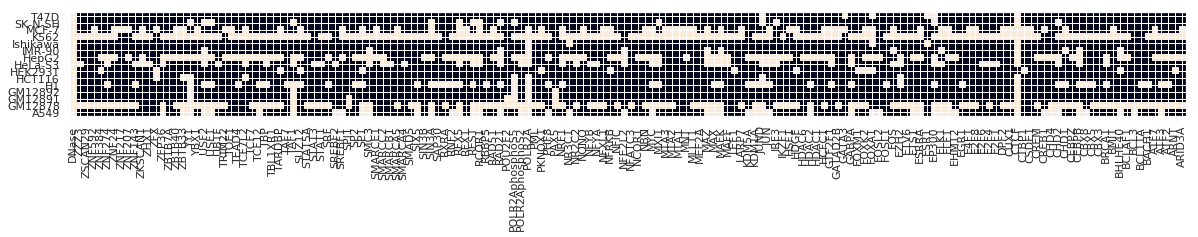

In [24]:
matrix, cellmap, assaymap = get_assays_from_feature_file(config["epitome_data_dir"] + "feature_name",
                                                         eligible_assays = None,
                                  eligible_cells = None, min_cells_per_assay = 2, min_assays_per_cell=5)

nv_assaymap = {v: k for k, v in assaymap.items()}

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.xticks(np.arange(len(assaymap)), rotation = 90)
ax.set_xticklabels(assaymap.keys())
plt.yticks(np.arange(len(cellmap)))
ax.set_yticklabels(cellmap.keys())

plt.imshow(matrix!=Label.UNK.value)

In [20]:

TFs = list(map(lambda x: x[0], EPITOME_AND_DEFCOM_TFS))
TFs

['CEBPB',
 'CHD2',
 'CTCF',
 'EP300',
 'GABPA',
 'REST',
 'JUND',
 'MAFK',
 'MAX',
 'MYC',
 'NRF1',
 'RAD21',
 'RFX5',
 'SRF',
 'TAF1',
 'TBP',
 'USF2']

In [6]:
# Train model
model= VLP(data,
            ['A549'],
            matrix,
            assaymap,
            cellmap,
            shuffle_size=2, 
            batch_size=64)
model.train(5000)


eval cell types ['T47D', 'SK-N-SH', 'MCF-7', 'K562', 'Ishikawa', 'IMR-90', 'HepG2', 'HeLa-S3', 'HEK293T', 'HCT116', 'H1', 'GM12892', 'GM12891', 'GM12878']


W0821 10:29:19.370249 139999370950400 deprecation.py:323] From /data/miniconda3/envs/EpitomeEnv_c76/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:505: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
I0821 10:29:19.433995 139999370950400 models.py:6

using ['T47D', 'SK-N-SH', 'MCF-7', 'K562', 'Ishikawa', 'IMR-90', 'HepG2', 'HeLa-S3', 'HEK293T', 'HCT116', 'H1', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.TRAIN
using ['T47D', 'SK-N-SH', 'MCF-7', 'K562', 'Ishikawa', 'IMR-90', 'HepG2', 'HeLa-S3', 'HEK293T', 'HCT116', 'H1', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.VALID
using ['A549'] as labels for mode Dataset.TEST


W0821 10:29:21.352243 139999370950400 deprecation.py:323] From /data/miniconda3/envs/EpitomeEnv_c76/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
I0821 10:29:24.764572 139999370950400 models.py:721] 0 tf.Tensor(0.0043224287, shape=(), dtype=float32)tf.Tensor(0.0043224287, shape=(), dtype=float32)tf.Tensor(0.0, shape=(), dtype=float32)
I0821 10:30:47.092393 139999370950400 models.py:721] 1000 tf.Tensor(0.0009119269, shape=(), dtype=float32)tf.Tensor(0.0009119269, shape=(), dtype=float32)tf.Tensor(0.0, shape=(), dtype=float32)
I0821 10:32:11.597627 139999370950400 models.py:721] 2000 tf.Tensor(0.00063233497, shape=(), dtype=float32)tf.Tensor(0.00063233497, shape=(), dtype=float32)tf.Tensor(0.0, shape=(), dtype=float32)
I0821 10:33:35.286691 13999

In [8]:
# case 1: known cell type, known region

_, g = generator_to_tf_dataset(load_data(data[Dataset.TRAIN], 
                                               ['K562'], 
                                               model.eval_cell_types,
                                               model.matrix,
                                               model.assaymap,
                                               model.cellmap,
                                               indices = np.arange(0,4000),
                                               radii = model.radii, mode = Dataset.TRAIN),
                                               model.batch_size, 1, model.prefetch_size)
results = model.test_from_generator(4000, g)

using ['K562'] as labels for mode Dataset.TRAIN


100%|██████████| 500/500 [02:01<00:00,  3.91it/s]
I0821 10:42:03.683067 139999370950400 models.py:896] macro auROC:     0.8446232552291442
I0821 10:42:03.685471 139999370950400 models.py:897] auPRC:     0.2510151685946751
I0821 10:42:03.686447 139999370950400 models.py:898] GINI:     0.6892467748412651


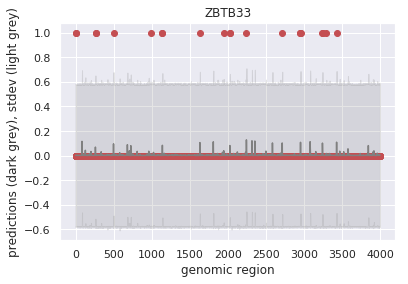

In [9]:
%matplotlib inline  
plot_uncertainty(results['preds_mean'][:,assaymap['ZBTB33'] - 1], 
                 results['preds_std'][:,assaymap['ZBTB33'] - 1], 
                 results['truth'][:,assaymap['ZBTB33'] - 1], title="ZBTB33")


In [11]:
# Random predictions

gen = shuffled_data(data[Dataset.VALID], 
                           ['A549'], 
                           model.eval_cell_types,
                           model.matrix,
                           model.assaymap,
                           model.cellmap,
                           indices = np.arange(0,4000),
                           radii = model.radii, mode = Dataset.TEST)


_, g = generator_to_tf_dataset(gen, model.batch_size, 1, model.prefetch_size)
results_shuffled = model.test_from_generator(4000, g)

using ['A549'] as labels for mode Dataset.TEST


100%|██████████| 500/500 [02:04<00:00,  4.17it/s]
I0821 10:47:49.520188 139999370950400 models.py:896] macro auROC:     0.5586330031710677
I0821 10:47:49.522603 139999370950400 models.py:897] auPRC:     0.0052575302457993816
I0821 10:47:49.523640 139999370950400 models.py:898] GINI:     0.11726762755084996


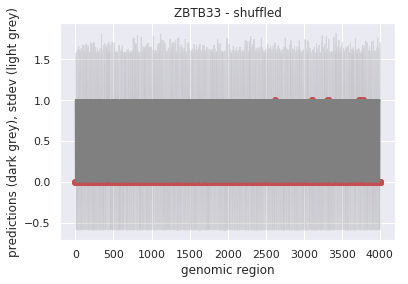

In [12]:
%matplotlib inline  
plot_uncertainty(results_shuffled['preds_mean'][:,assaymap['ZBTB33'] - 1], 
                 results_shuffled['preds_std'][:,assaymap['ZBTB33'] - 1], 
                 results_shuffled['truth'][:,assaymap['ZBTB33'] - 1], title="ZBTB33 - shuffled")


# does it perform as well as original?

- yes. equivalent and sometimes higher PR for a couple factors.

In [17]:
# class PeakModel():
#     def __init__(self,
#                  data,
#                  test_celltypes,
#                  matrix,
#                  assaymap,
#                  cellmap,  
#                  debug = False,
#                  batch_size=64,
#                  shuffle_size=10,
#                  prefetch_size=10,
#                  l1=0.,
#                  l2=0.,
#                  lr=1e-3,
#                  radii=[1,3,10,30], 
#                  split_indices = None):
        
#         """
#         Peak Model
#         :param data: either a path to TF records OR a dictionary of TRAIN, VALID, and TEST data
#         :param test_celltypes
#         :param matrix
#         :param assaymap
#         :param cellmap
#         :param debug: used to print out intermediate validation values
#         :param batch_size
#         :param shuffle_size
#         :param prefetch_size
#         :param l1
#         :param l2
#         :param lr
#         :param radii
#         :param split_indices: used to indicate boundaries of train, cv, and test sets
#         """
        
#         tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

#         assert (set(test_celltypes) < set(list(cellmap))), \
#                 "test_celltypes %s must be subsets of available cell types %s" % (str(test_celltypes), str(list(cellmap)))

#         # get evaluation cell types by removing any cell types that would be used in test
#         self.eval_cell_types = list(cellmap)
#         self.test_celltypes = test_celltypes
#         [self.eval_cell_types.remove(test_cell) for test_cell in self.test_celltypes]
#         print("eval cell types", self.eval_cell_types)
#         assert (len(self.eval_cell_types) >= 2 ), \
#             "there must be more than one eval_cell_type {} for feature rotation".format(self.eval_cell_types)

        
#         # if split  indices were specified, then subset the dataset differently.
#         if(split_indices != None):
#             # configure the data
#             combined_data = np.append(data[Dataset.TRAIN], data[Dataset.VALID], axis =1)
#             combined_data = np.append(combined_data, data[Dataset.TEST], axis =1)

#             start_train, end_train = split_indices[0]
#             start_cv, end_cv       = split_indices[1]
#             start_test, end_test   = split_indices[2]

#             train_data = combined_data[:,start_train:end_train]
#             valid_data = combined_data[:,start_cv:end_cv]
#             test_data  = combined_data[:,start_test:end_test]
#         else:
#             train_data = data[Dataset.TRAIN]
#             valid_data = data[Dataset.VALID]
#             test_data  = data[Dataset.TEST]

#         self.output_shape, self.train_iter = generator_to_tf_dataset(load_data(train_data,  
#                                                 self.eval_cell_types,
#                                                 self.eval_cell_types,
#                                                 matrix,
#                                                 assaymap,
#                                                 cellmap,
#                                                 radii = radii, mode = Dataset.TRAIN),
#                                                 batch_size, shuffle_size, prefetch_size)

#         _,            self.valid_iter = generator_to_tf_dataset(load_data(valid_data, 
#                                                 self.eval_cell_types,
#                                                 self.eval_cell_types,
#                                                 matrix,
#                                                 assaymap,
#                                                 cellmap,
#                                                 radii = radii, mode = Dataset.VALID), 
#                                                 batch_size, 1, prefetch_size)

#         # can be empty if len(test_celltypes) == 0
#         _,            self.test_iter = generator_to_tf_dataset(load_data(test_data, 
#                                                self.test_celltypes, 
#                                                self.eval_cell_types,
#                                                matrix,
#                                                assaymap,
#                                                cellmap,
#                                                radii = radii, mode = Dataset.TEST),
#                                                batch_size, 1, prefetch_size)

#         self.num_outputs = self.output_shape[0]
#         self.l1, self.l2 = l1, l2
#         self.lr = lr
#         self.batch_size = batch_size
#         self.prefetch_size = prefetch_size
#         self.shuffle_size = shuffle_size
#         self.optimizer =tf.keras.optimizers.Adam(lr=self.lr)

#         # set self
#         self.model = self.create_model()
#         self.radii = radii
#         self.debug = debug
#         self.assaymap = assaymap
#         self.test_celltypes = test_celltypes
#         self.matrix = matrix
#         self.assaymap= assaymap 
#         self.cellmap = cellmap
#         self.data = data
            
#     def save(self, checkpoint_path):
#         """
#         Saves model.
        
#         :param checkpoint_path: string file path to save model to. 
#         """
#         # save keras model
#         self.model.save(checkpoint_path)
        
#         # save model params to pickle file
#         dict_ = {'test_celltypes':self.test_celltypes,
#                          'matrix':self.matrix,
#                          'assaymap':self.assaymap,
#                          'cellmap':self.cellmap,  
#                          'debug': self.debug,
#                          'batch_size':self.batch_size,
#                          'shuffle_size':self.shuffle_size,
#                          'prefetch_size':self.prefetch_size,
#                          'radii':self.radii}
        
#         fileObject = open(os.path.join(checkpoint_path, "model_params.pickle"),'wb')
#         pickle.dump(dict_,fileObject)   
#         fileObject.close()
        
        
#     def gini(self, actual, pred, sample_weight):                                                 
#         df = sorted(zip(actual, pred), key=lambda x : (x[1], x[0]),  reverse=True)
#         random = [float(i+1)/float(len(df)) for i in range(len(df))]                
#         totalPos = np.sum([x[0] for x in df])           
#         cumPosFound = np.cumsum([x[0] for x in df])                                     
#         Lorentz = [float(x)/totalPos for x in cumPosFound]                          
#         Gini = np.array([l - r for l, r in zip(Lorentz, random)])
#         # mask Gini with weights
#         Gini[np.where(sample_weight == 0)[0]] = 0
#         return np.sum(Gini)    

#     def gini_normalized(self, actual, pred, sample_weight = None):              
#         normalized_gini = self.gini(actual, pred, sample_weight)/self.gini(actual, actual, sample_weight)      
#         return normalized_gini       

#     def body_fn(self):
#         raise NotImplementedError()
        
#     def g(self, p, a=1, B=0, y=1):
#         """ Normalization Function. Normalizes loss w.r.t. label proportion.

#         Constraints: 
#          1. g(p) = 1 when p = 1
#          2. g(p) = a * p^y + B, where a, y and B are hyperparameters
#         """
#         return a * tf.math.pow(p, y) + B
    
#     def loss_fn(self, y_true, y_pred, weights):
#         # weighted sum of cross entropy for non 0 weights
#         # Reduction method = Reduction.SUM_BY_NONZERO_WEIGHTS
#         loss = tf.compat.v1.losses.sigmoid_cross_entropy(y_true,  
#                                                         y_pred[:, Features.FEATURE_IDX.value, :], 
#                                                         weights = weights,
#                                                         reduction = tf.compat.v1.losses.Reduction.SUM_BY_NONZERO_WEIGHTS)

#         C = (len(self.assaymap)-1)
#         # p = tf.math.reduce_sum(weights, axis=1)/C # should be of dimension 1 by batch size
#         p = 1.0 # this is just taking the mean loss, nothing special here.
#         return self.g(p)/C * loss
        
#     def train(self, num_steps, lr=None, checkpoint_path = None):
#         if lr == None:
#             lr = self.lr
            
#         tf.compat.v1.logging.info("Starting Training")

#         @tf.function
#         def train_step(inputs, labels, weights):
#             with tf.GradientTape() as tape:
#                 predictions = self.model(inputs, training=True)
#                 regularization_loss = tf.math.add_n(self.model.losses)
#                 pred_loss = self.loss_fn(labels, predictions, weights)
#                 total_loss = pred_loss + regularization_loss

#             gradients = tape.gradient(total_loss, self.model.trainable_variables)
#             self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
#             return total_loss
        
#         for step, (inputs, labels, weights) in enumerate(self.train_iter.take(num_steps)): 

#             loss = train_step(inputs, labels, weights)

#             if step % 1000 == 0:
#                 tf.compat.v1.logging.info(str(step) + " " + str(tf.reduce_mean(loss)))
                
#                 if (self.debug):
#                     tf.compat.v1.logging.info("On validation")
#                     _, _, _, _, _ = self.test(40000, log=False)
#                     tf.compat.v1.logging.info("")

#     def test(self, num_samples, mode = Dataset.VALID, calculate_metrics=False):
#         """
#         Tests model on valid and test dataset handlers.
#         """

#         if (mode == Dataset.VALID):
#             handle = self.valid_iter # for standard validation of validation cell types
            
#         elif (mode == Dataset.TEST and len(self.test_celltypes) > 0):
#             handle = self.test_iter # for standard validation of validation cell types        
#         else:
#             raise Exception("No data exists for %s. Use function test_from_generator() if you want to create a new iterator." % (mode))
            
#         return self.run_predictions(num_samples, handle, calculate_metrics)      
        
#     def test_from_generator(self, num_samples, ds, calculate_metrics=True):
#         """
#         Runs test given a specified data generator 
#         :param num_samples: number of samples to test
#         :param ds: tensorflow dataset, created by dataset_to_tf_dataset
#         :param cell_type: cell type to test on. Used to generate holdout indices.
        
#         :return predictions
#         """
#         return self.run_predictions(num_samples, ds, calculate_metrics)
    
#     def eval_vector(self, data, vector, indices):
#         """
#         Evaluates a new cell type based on its chromatin (DNase or ATAC-seq) vector. len(vector) should equal
#         the data.shape[1]
#         :param data: data to build features from 
#         :param vector: vector of 0s/1s of binding sites TODO AM 4/3/2019: try peak strength instead of 0s/1s
#         :param indices: indices of vector to actually score. You need all of the locations for the generator.

#         :return predictions for all factors
#         """
        
#         _,  ds = generator_to_tf_dataset(load_data(data, 
#                  self.test_celltypes,   # used for labels. Should be all for train/eval and subset for test
#                  self.eval_cell_types,   # used for rotating features. Should be all - test for train/eval
#                  self.matrix,
#                  self.assaymap,
#                  self.cellmap,
#                  radii = self.radii,
#                  mode = Dataset.RUNTIME,
#                  dnase_vector = vector, indices = indices), self.batch_size, 1, self.prefetch_size)

#         num_samples = len(indices)
        
#         preds, _, _, _, _ = self.run_predictions(num_samples, ds, calculate_metrics = False)    
        
#         return preds

#     def run_predictions(self, num_samples, iter_, calculate_metrics = True):
#         """
#         Runs predictions on num_samples records
#         :param num_samples: number of samples to test
#         :param iter_: output of self.sess.run(generator_to_one_shot_iterator()), handle to one shot iterator of records
#         :param log: if true, logs individual factor accuracies
        
#         :return preds, truth, assay_dict, auROC, auPRC, False
#             preds = predictions, 
#             truth = actual values, 
#             sample_weight: 0/1 weights on predictions.  
#             assay_dict = if log=True, holds predictions for individual factors
#             auROC = average macro area under ROC for all factors with truth values
#             auPRC = average area under PRC for all factors with truth values
#         """
        
#         inv_assaymap = {v: k for k, v in self.assaymap.items()}
                
#         # batches of predictions
#         vals = []

#         for inputs, labels, weights in iter_.take(int(num_samples / self.batch_size)+1): 
#             vals.append([tf.sigmoid(self.model(inputs, training=False)), inputs, labels, weights])

            
#         preds = np.concatenate([v[0] for v in vals])
#         preds = preds[:,Features.FEATURE_IDX.value,:][:num_samples] # get feature row


#         truth = np.concatenate([v[2] for v in vals])[:num_samples]
#         sample_weight  = np.concatenate([v[3] for v in vals])[:num_samples]

#         # do not continue to calculate metrics. Just return predictions and true values
#         if (not calculate_metrics):
#             return {
#                 'preds': preds,
#                 'truth': truth,
#                 'weights': sample_weight,
#                 'assay_dict': None,
#                 'auROC': None, 
#                 'auPRC': None
#             }

#         assert(preds.shape == sample_weight.shape)

#         try:
#             # Mean results because sample_weight mask can only work on 1 row at a time.
#             # If a given assay is not available for evaluation, sample_weights will all be 0 
#             # and the resulting roc_auc_score will be NaN.
#             auROC_vec = []
#             auPRC_vec = []
#             GINI_vec =  []


#             # try/accept for cases with only one class (throws ValueError)
#             assay_dict = {}

#             for j in range(preds.shape[1]): # for all assays
#                 assay = inv_assaymap[j+1] 

#                 roc_score = np.NAN

#                 try:
#                     roc_score = sklearn.metrics.roc_auc_score(truth[:,j], preds[:,j], 
#                                                       average='macro', 
#                                                       sample_weight = sample_weight[:,j])

#                     auROC_vec.append(roc_score)

#                 except ValueError:
#                     roc_score = np.NaN

#                 try:
#                     pr_score = sklearn.metrics.average_precision_score(truth[:,j], preds[:,j], 
#                                                              sample_weight = sample_weight[:, j])

#                     auPRC_vec.append(pr_score)

#                 except ValueError:
#                     pr_score = np.NaN

#                 try:
#                     gini_score = self.gini_normalized(truth[:,j], preds[:,j], 
#                                                       sample_weight = sample_weight[:, j])

#                     GINI_vec.append(gini_score)

#                 except ValueError:
#                     gini_score = np.NaN

#                 assay_dict[assay] = {"AUC": roc_score, "auPRC": pr_score, "GINI": gini_score }


#             auROC = np.nanmean(auROC_vec)
#             auPRC = np.nanmean(auPRC_vec)

#             tf.compat.v1.logging.info("macro auROC:     " + str(auROC))
#             tf.compat.v1.logging.info("auPRC:     " + str(auPRC))
#             tf.compat.v1.logging.info("GINI:     " + str(np.nanmean(GINI_vec)))
#         except ValueError as v:
#             auROC = None
#             auPRC = None
#             tf.compat.v1.logging.info("Failed to calculate metrics")

#         return {
#             'preds': preds,
#             'truth': truth,
#             'weights': sample_weight,
#             'assay_dict': assay_dict,
#             'auROC': auROC, 
#             'auPRC': auPRC
#         }

        
#     def score_peak_file(self, peak_file):
    
#         # get peak_vector, which is a vector matching train set. Some peaks will not overlap train set, 
#         # and their indices are stored in missing_idx for future use
#         peak_vector, all_peaks = bedFile2Vector(peak_file, EPITOME_ALLTFS_BEDFILE + ".gz")
#         print("finished loading peak file")

#         # only select peaks to score
#         idx = np.where(peak_vector == True)[0]

#         if len(idx) == 0:
#             raise ValueError("No positive peaks found in %s" % peak_file)

#         all_data = np.concatenate((self.data[Dataset.TRAIN], self.data[Dataset.VALID], self.data[Dataset.TEST]), axis=1)


#         # takes about 1.5 minutes for 100,000 regions TODO AM 4/3/2019 speed up generator
#         predictions = self.eval_vector(all_data, peak_vector, idx)

#         print("finished predictions...", predictions.shape)

#         # get number of factors to fill in if values are missing
#         num_factors = predictions[0].shape[0]


#         def load_bed_regions(bedfile):
#             ''' Loads Deepsea bed file (stored as .gz format).

#             :return list of genomic Regions the size of train/valid/test data. 
#             '''

#             with gzip.open(bedfile, 'r') as f:
#                     liPositions = f.readlines()

#             def fromString(x):
#                 tmp = x.decode("utf-8").split('\t')
#                 return Region(tmp[0], int(tmp[1]), int(tmp[2]))

#             return list(map(lambda x: fromString(x), liPositions))

#         # map predictions with genomic position
#         liRegions = load_bed_regions(EPITOME_ALLTFS_BEDFILE + ".gz")
#         prediction_positions = itemgetter(*idx)(liRegions)
#         zipped = list(zip(prediction_positions, predictions))

#         def reduceMeans(peak):

#             if (peak[1] == 1):
#                 # parse region

#                 # filter overlapping predictions for this peak and take mean  
#                 res = map(lambda k: k[1], filter(lambda x: Region.overlaps(peak[0], x[0], 1), zipped)) # this must be changed
#                 arr = np.concatenate(list(map(lambda x: np.matrix(x), res)), axis = 0)
#                 return(peak[0], np.mean(arr, axis = 0))
#             else:
#                 return(peak[0], np.zeros(num_factors)) 

#         grouped = list(map(lambda x: np.matrix(reduceMeans(x)[1]), zip(all_peaks[0], all_peaks[1])))

#         final = np.concatenate(grouped, axis=0)

#         df = pd.DataFrame(final, columns=list(self.assaymap)[1:])

#         # load in peaks to get positions and could be called only once
#         # TODO why are you reading this in twice?
#         df_pos = pd.read_csv(peak_file, sep="\t", header = None)[[0,1,2]]
#         final_df = pd.concat([df_pos, df], axis=1)
#         return final_df
            

# class MLP(PeakModel):
#     def __init__(self,
#              *args,
#              **kwargs):

#         """ To resume model training, call:
#             model2 = MLP(data = data, checkpoint="/home/eecs/akmorrow/epitome/out/models/test_model")
#         """
#         self.layers = 4
#         self.num_units = [100, 100, 100, 50]
#         self.activation = tf.tanh
                          
#         if "checkpoint" in kwargs.keys():
#             fileObject = open(kwargs["checkpoint"] + "/model_params.pickle" ,'rb')
#             metadata = pickle.load(fileObject)
#             PeakModel.__init__(self, kwargs["data"], **metadata)
#             self.model = tf.keras.models.load_model(kwargs["checkpoint"])
            
#         else: 
#             PeakModel.__init__(self, *args, **kwargs)
            
#     def create_model(self):
        
#         # this is called like model(data, training = True)
#         model = tf.keras.Sequential()

#         if not isinstance(self.num_units, collections.Iterable):
#             self.num_units = [self.num_units] * self.layers
#         for i in range(self.layers):
#             model.add(tf.keras.layers.Dense(self.num_units[i], activation = self.activation))

#         # output layer
#         model.add(tf.keras.layers.Dense(self.num_outputs, kernel_regularizer=tf.keras.regularizers.l1_l2(self.l1, self.l2)))
#         return model



In [22]:
model_MLP = MLP(data,
            ['A549'],
            matrix,
            assaymap,
            cellmap,
            shuffle_size=2, 
            batch_size=64)
model_MLP.train(5000)


eval cell types ['T47D', 'SK-N-SH', 'MCF-7', 'K562', 'Ishikawa', 'IMR-90', 'HepG2', 'HeLa-S3', 'HEK293T', 'HCT116', 'H1', 'GM12892', 'GM12891', 'GM12878']


I0821 10:50:17.182106 139999370950400 models.py:211] Starting Training


using ['T47D', 'SK-N-SH', 'MCF-7', 'K562', 'Ishikawa', 'IMR-90', 'HepG2', 'HeLa-S3', 'HEK293T', 'HCT116', 'H1', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.TRAIN
using ['T47D', 'SK-N-SH', 'MCF-7', 'K562', 'Ishikawa', 'IMR-90', 'HepG2', 'HeLa-S3', 'HEK293T', 'HCT116', 'H1', 'GM12892', 'GM12891', 'GM12878'] as labels for mode Dataset.VALID
using ['A549'] as labels for mode Dataset.TEST


I0821 10:50:19.396850 139999370950400 models.py:230] 0 tf.Tensor(0.0043006176, shape=(), dtype=float32)
I0821 10:51:41.028356 139999370950400 models.py:230] 1000 tf.Tensor(0.0010789656, shape=(), dtype=float32)
I0821 10:53:01.892826 139999370950400 models.py:230] 2000 tf.Tensor(0.0014512434, shape=(), dtype=float32)
I0821 10:54:22.769743 139999370950400 models.py:230] 3000 tf.Tensor(0.00064870325, shape=(), dtype=float32)
I0821 10:55:43.865411 139999370950400 models.py:230] 4000 tf.Tensor(0.0008058882, shape=(), dtype=float32)


In [24]:
_, g = generator_to_tf_dataset(load_data(data[Dataset.TRAIN], 
                                               ['K562'], 
                                               model_MLP.eval_cell_types,
                                               model_MLP.matrix,
                                               model_MLP.assaymap,
                                               model_MLP.cellmap,
                                               indices = np.arange(0,4000),
                                               radii = model_MLP.radii, mode = Dataset.TRAIN),
                                               model_MLP.batch_size, 1, model_MLP.prefetch_size)
results_original = model_MLP.test_from_generator(4000, g)

using ['K562'] as labels for mode Dataset.TRAIN


I0821 10:58:04.014746 139999370950400 models.py:386] macro auROC:     0.8373445402718197
I0821 10:58:04.017132 139999370950400 models.py:387] auPRC:     0.234424474184845
I0821 10:58:04.018167 139999370950400 models.py:388] GINI:     0.6746912394820299


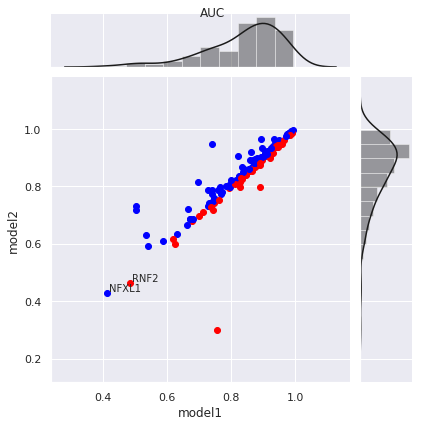

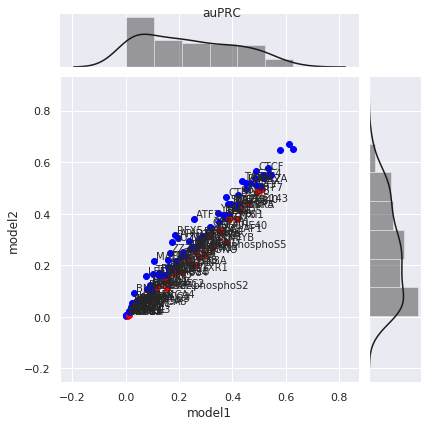

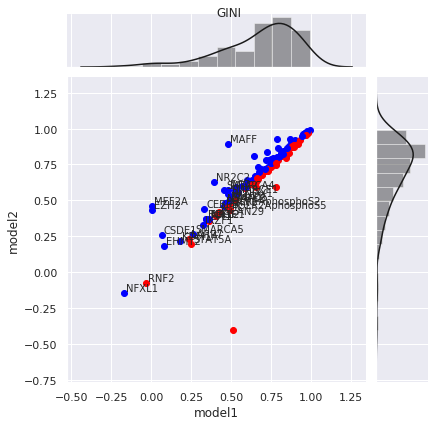

In [25]:
for metric in results['assay_dict']['ZZZ3'].keys():
    joint_plot(results_original['assay_dict'], results['assay_dict'], metric = metric,
              outlier_filter = "model1 < 0.5")

# Exploring model parameters

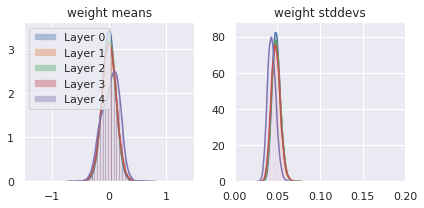

In [26]:

names, means, stds = model.get_weight_parameters()
plot_weight_posteriors(names, means, stds, fname=None)

# Correlation between auPRC and stdev

Here, we look at the correlation between performance, measured in auPRC and the standard deviation of weights in the last layer of the network going to a given TF. We can see that as performance decreases, stdev increases.

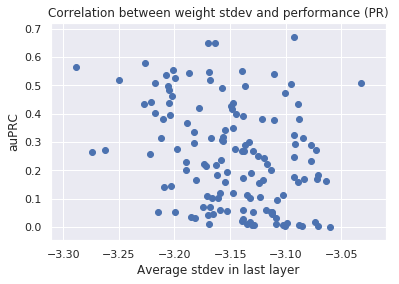

In [27]:
%matplotlib inline
weight_stds = np.mean(stds[-1], axis=0)
weight_means = np.mean(means[-1], axis=0)
PR_scores = list(map(lambda x: x['auPRC'], results['assay_dict'].values()))
ones = np.sum(results['truth'], axis=0)

fig, ax = plt.subplots()
ax.scatter(np.log(weight_stds), PR_scores)

    
ax.set_xlabel("Average stdev in last layer")
ax.set_ylabel("auPRC")
ax.set_title("Correlation between weight stdev and performance (PR)")
plt.show()